<a href="https://colab.research.google.com/github/FmRadioAlex/-----/blob/main/goit_data_hw_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання 1

​

# У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

In [507]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [508]:
data_2d_url='/content/drive/MyDrive/Colab Notebooks/data/data_2d.csv'
data_2d=pd.read_csv(data_2d_url)
data_2d.head()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


In [509]:
scaler = StandardScaler()
data_2d_scaler = scaler.fit_transform(data_2d)

In [510]:
pca = PCA(n_components=2)
data_2d_pca = pca.fit_transform(data_2d_scaler)

In [511]:
inertia_2d = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data_2d_scaler)
    inertia_2d.append(kmeans.inertia_)

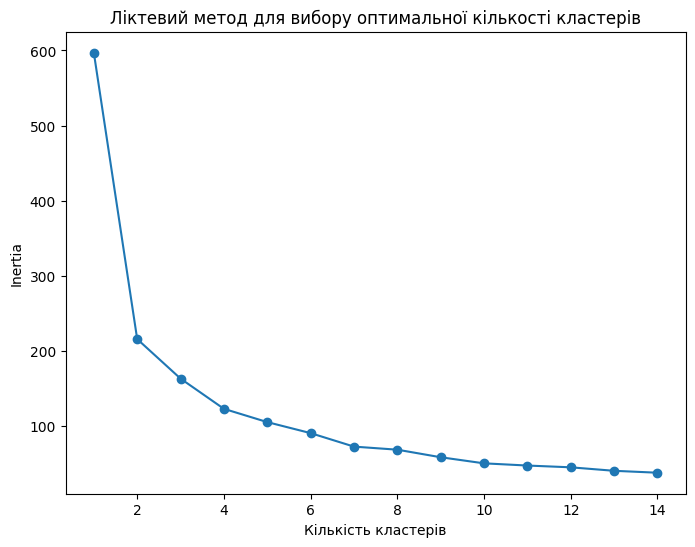

In [512]:
plt.figure(figsize=(8, 6))
plt.plot(K, inertia_2d, marker='o')
plt.title('Ліктевий метод для вибору оптимальної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.show()

In [513]:
mnist_url='/content/drive/MyDrive/Colab Notebooks/data/mnist.csv'
mnist=pd.read_csv(mnist_url)
mnist.head()
sclaer=MinMaxScaler()
mnist_scaler=scaler.fit_transform(mnist)

In [514]:
inertia_kmeans = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k,n_init='auto')
    kmeans.fit(mnist_scaler)
    inertia_kmeans.append(kmeans.inertia_)

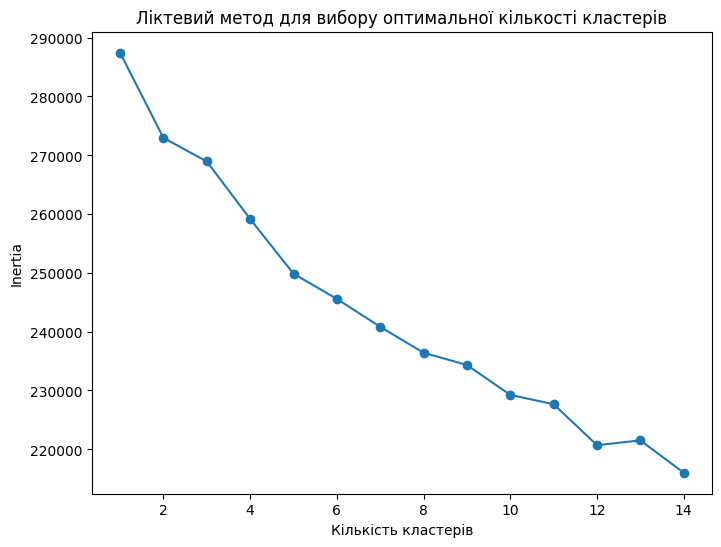

In [515]:
plt.figure(figsize=(8, 6))
plt.plot(K, inertia_kmeans, marker='o')
plt.title('Ліктевий метод для вибору оптимальної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.show()

# Завдання 2

​

Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

In [523]:
print(data_2d_scaler[:10])

[[-1.00503782  0.74680509  0.09164376]
 [-1.00503782 -1.60808161 -1.09343098]
 [-1.00503782 -0.94798671 -0.62167696]
 [-1.00503782 -1.51101032 -0.67677871]
 [-1.00503782  0.2538759   0.29630027]
 [-1.00503782 -0.21889788 -0.71575204]
 [-1.00503782 -1.12471868 -1.56703272]
 [-1.00503782 -1.18200492 -0.57709727]
 [-1.00503782 -0.96204436 -1.30820536]
 [-1.00503782 -0.50615863 -1.55385225]]


In [517]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)
kmeans.fit(data_2d_pca)
labels = kmeans.labels_

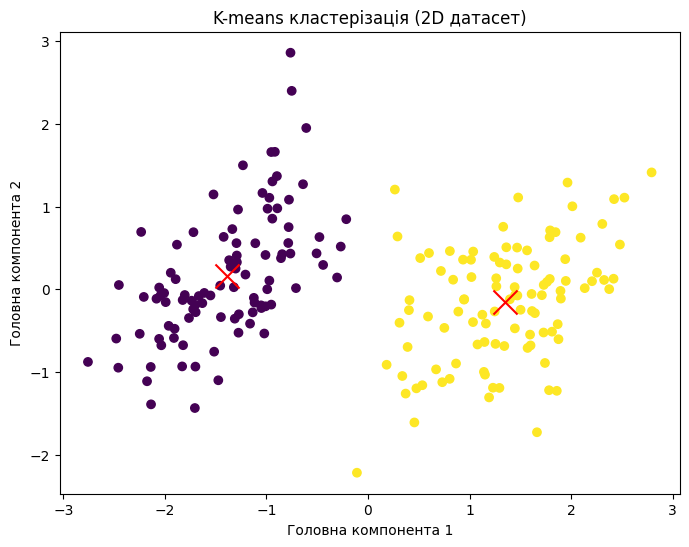

In [518]:
plt.figure(figsize=(8, 6))
plt.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title('K-means кластерізація (2D датасет)')
plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.show()

In [519]:
pca = PCA(n_components=2)
data_mnist_pca = pca.fit_transform(mnist_scaler)

In [520]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k,n_init='auto')
kmeans.fit(mnist_scaler)
labels = kmeans.labels_


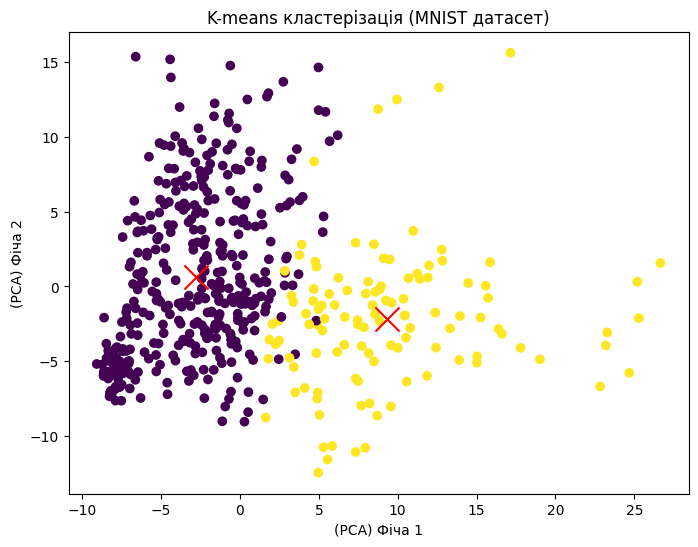

In [521]:
plt.figure(figsize=(8, 6))
plt.scatter(data_mnist_pca[:, 0], data_mnist_pca[:, 1], c=labels, marker='o')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], s=300, c='red', marker='x')
plt.title('K-means кластерізація (MNIST датасет)')
plt.xlabel('(PCA) Фіча 1')
plt.ylabel('(PCA) Фіча 2')
plt.show()